In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
# finding the test data set
atest=pd.read_csv('test_agriculture.csv')
atest

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [72]:
# finding the shape of the test data set
atest.shape

(1199, 9)

In [73]:
# finding the train data set
atrain=pd.read_csv('train_agriculture.csv')
atrain

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [74]:
# finding the shape of the train data set
atrain.shape

(4599, 10)

In [75]:
# finding the data types of each column
print(atest.dtypes)
print('\n')
print(atrain.dtypes)

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object


ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object


In [76]:
# finding the missing values in the data
print(atest.isnull().sum())
print('\n')
print(atrain.isnull().sum())

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64


ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64


In [77]:
# Removing the missing values in the data
atest['Number_Weeks_Used'].fillna(atest['Number_Weeks_Used'].median(),inplace=True)
atrain['Number_Weeks_Used'].fillna(atest['Number_Weeks_Used'].median(),inplace=True)

AxesSubplot(0.125,0.125;0.62x0.755)


AxesSubplot(0.125,0.125;0.496x0.755)


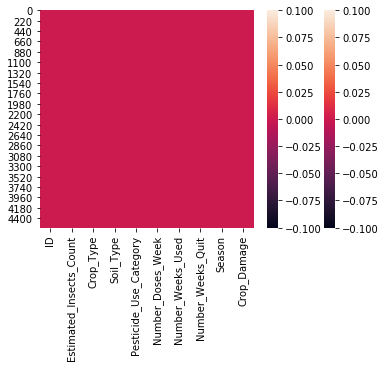

In [78]:
# It shows that there is no missing values are present in both data set
print(sns.heatmap(atest.isnull()))
print('\n')
print(sns.heatmap(atrain.isnull()))

In [79]:
# Statistical description of agriculture test data set
atest.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,28.930776,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.134584,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [80]:
# statistical description of agriculture of train data set
atrain.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [81]:
# adding both train and test of agriculture data set
ads=pd.concat([atest,atrain],ignore_index=True)
ads

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,28.0,0,2,NaN
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
5793,F00008078,2138,0,1,2,20,28.0,1,1,1.0
5794,F00008079,2139,0,1,2,30,47.0,2,1,1.0
5795,F00008080,2267,0,1,2,10,7.0,27,2,0.0
5796,F00008082,2267,0,1,2,10,20.0,24,2,0.0


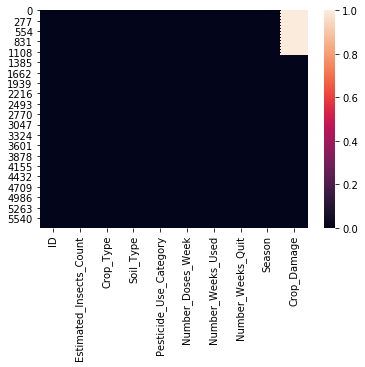

In [82]:
# finding missing values in the data
sns.heatmap(ads.isnull())

In [83]:
# removing the missing values with its median
ads['Crop_Damage'].fillna(ads['Crop_Damage'].median(),inplace=True)

In [84]:
# Finding the statistical description of the data
ads.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.831321,8.760262,1.891687,0.154191
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.002221,9.582781,0.692997,0.412449
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [85]:
# finding the top five data
ads.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,28.0,0,2,0.0
1,F00000007,410,1,1,1,0,0.0,0,2,0.0
2,F00000011,626,1,0,1,0,0.0,0,2,0.0
3,F00000013,731,1,0,1,0,0.0,0,2,0.0
4,F00000014,789,0,0,1,0,0.0,0,1,0.0


In [86]:
# finding the bottom five data
ads.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5793,F00008078,2138,0,1,2,20,28.0,1,1,1.0
5794,F00008079,2139,0,1,2,30,47.0,2,1,1.0
5795,F00008080,2267,0,1,2,10,7.0,27,2,0.0
5796,F00008082,2267,0,1,2,10,20.0,24,2,0.0
5797,F00008083,2267,0,1,2,10,33.0,17,2,0.0


In [87]:
# finding the statistical description of the data
ads.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.831321,8.760262,1.891687,0.154191
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.002221,9.582781,0.692997,0.412449
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [88]:
# finding the coorelation of data
ads.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.441155,0.228822,-0.002287,0.182373
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010701,-0.290973,0.003754,0.024936
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.103005,-0.062686,-0.005204,-0.048734
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.375233,-0.574041,0.009279,0.153633
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.104718,-0.024209,0.002751,-0.016304
Number_Weeks_Used,0.441155,0.010701,-0.103005,0.375233,0.104718,1.000000,-0.427512,-0.004914,0.200955
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.427512,1.000000,0.010324,-0.118133
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.004914,0.010324,1.000000,-0.012775
Crop_Damage,0.182373,0.024936,-0.048734,0.153633,-0.016304,0.200955,-0.118133,-0.012775,1.000000


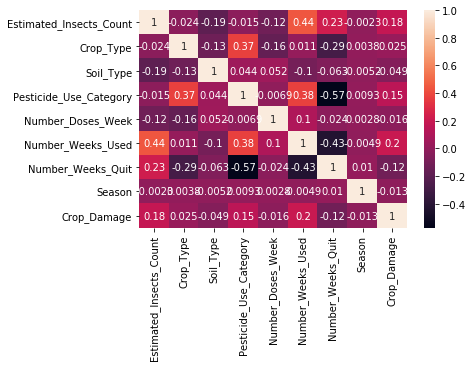

In [89]:
sns.heatmap(ads.corr(),annot=True)

In [90]:
# finding the data types of each columns
ads.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

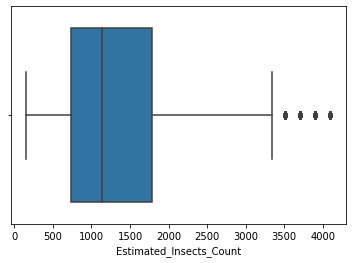

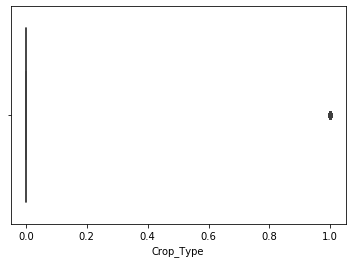

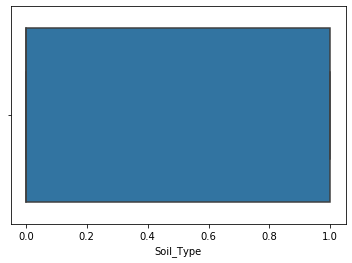

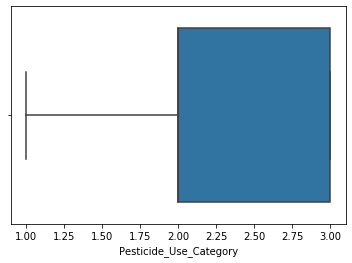

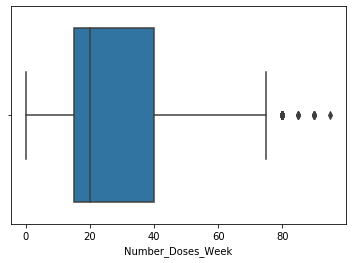

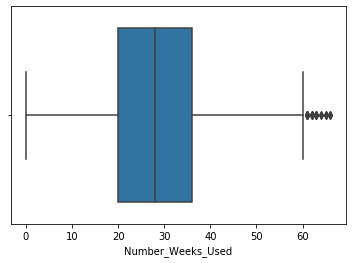

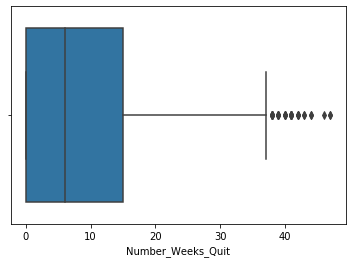

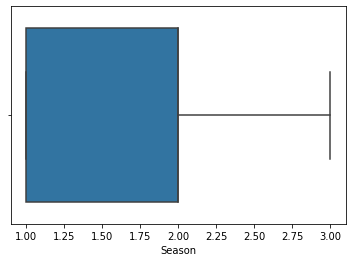

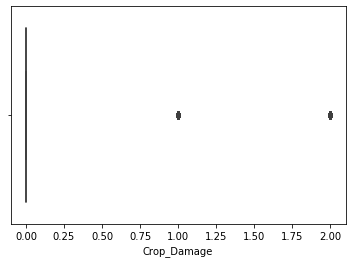

In [91]:
# finding the outliers within the data
for i in ads.describe().columns:
    sns.boxplot(ads[i].dropna())
    plt.show()
# it shows that there are some outliers present in the data

# finding the distribution of skewness within the data

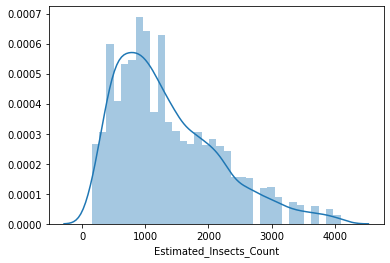

In [92]:
sns.distplot(ads['Estimated_Insects_Count'])

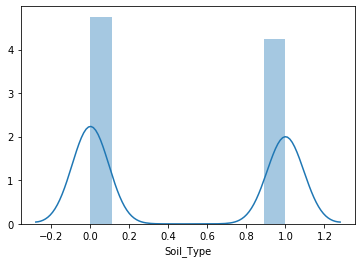

In [93]:
sns.distplot(ads['Soil_Type'])

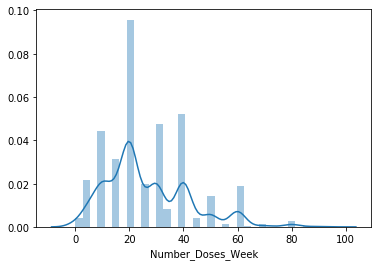

In [94]:
sns.distplot(ads['Number_Doses_Week'])

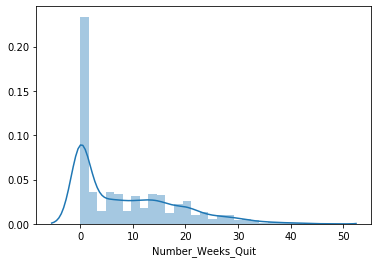

In [95]:
sns.distplot(ads['Number_Weeks_Quit'])

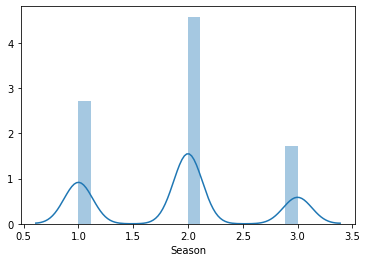

In [96]:
sns.distplot(ads['Season'])

# Finding Univariate and Bivariate Analysis of the data

{'whiskers': [<matplotlib.lines.Line2D at 0x24622e5cfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x24622e61f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24622e5c788>],
 'medians': [<matplotlib.lines.Line2D at 0x24622e64f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24622e64fc8>],
 'means': []}

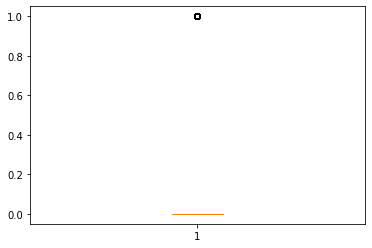

In [97]:
plt.boxplot(ads['Crop_Type'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24622ec4cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x24622ec9c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24622ec4308>],
 'medians': [<matplotlib.lines.Line2D at 0x24622eccb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x24622eccc88>],
 'means': []}

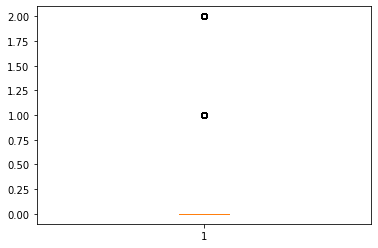

In [98]:
plt.boxplot(ads['Crop_Damage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24622f31fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x24622f35f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24622f31648>],
 'medians': [<matplotlib.lines.Line2D at 0x24622f39ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24622f39fc8>],
 'means': []}

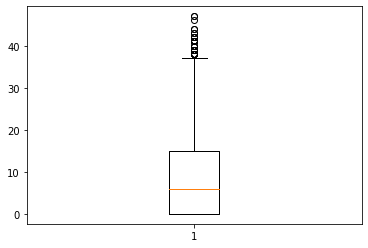

In [99]:
plt.boxplot(ads['Number_Weeks_Quit'])

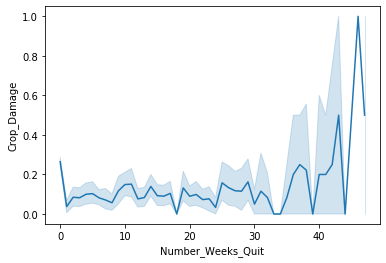

In [100]:
sns.lineplot(x='Number_Weeks_Quit',y='Crop_Damage',data=ads)

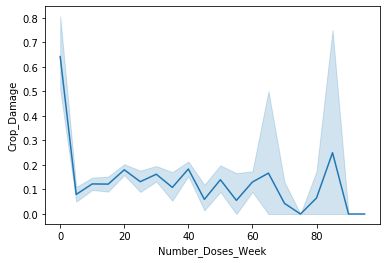

In [101]:
sns.lineplot(x='Number_Doses_Week',y='Crop_Damage',data=ads)

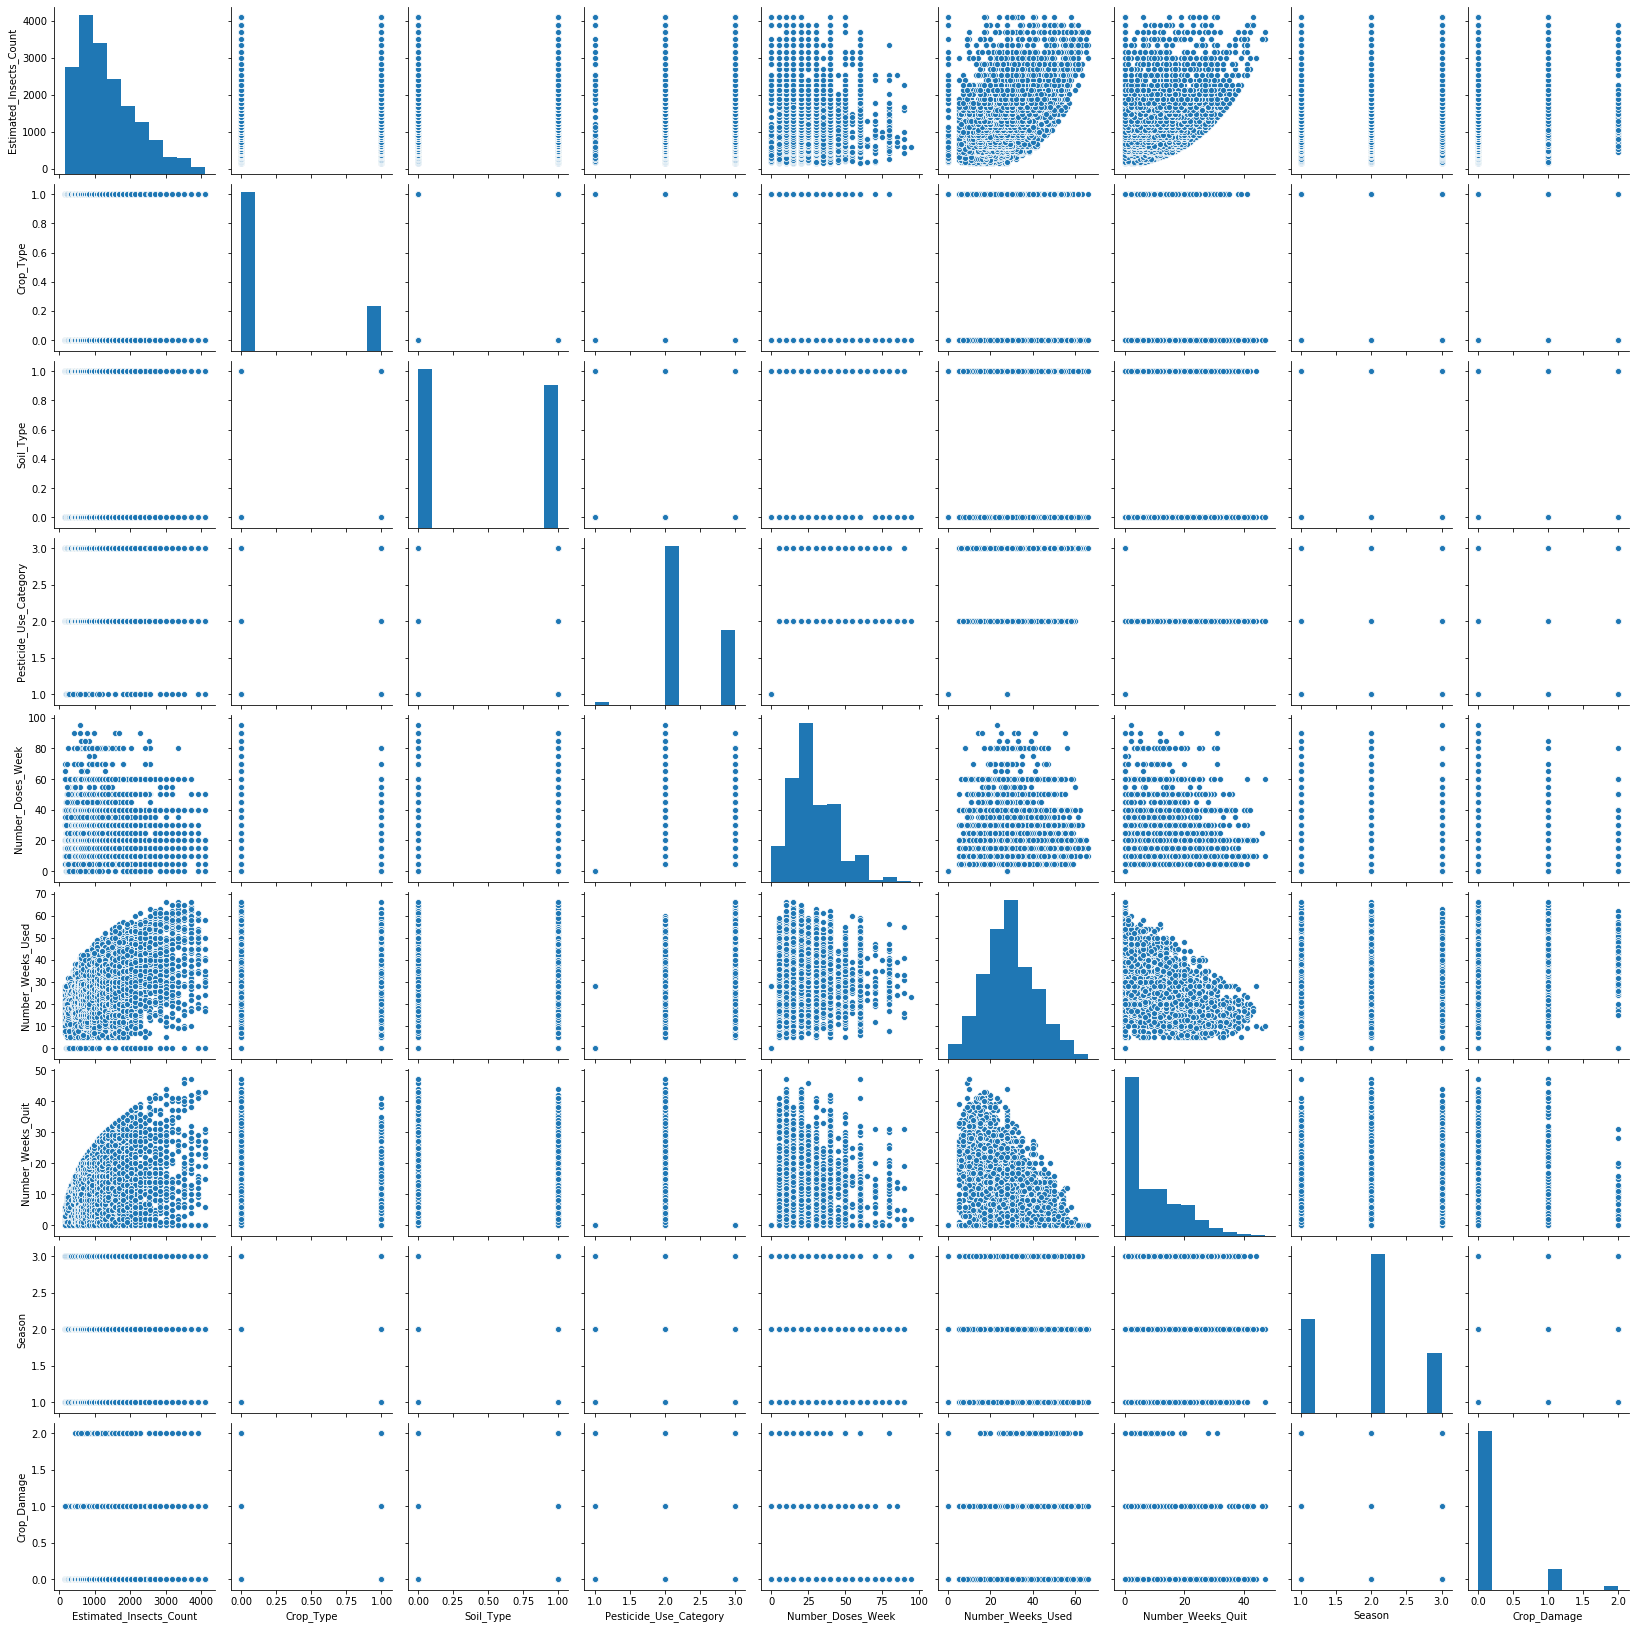

In [102]:
sns.pairplot(ads)

# Removing the skewness and Outliers from the data set

In [103]:
del(ads['ID'])

In [104]:
ads.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.288353
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.721552
dtype: float64

In [105]:
from scipy.stats import zscore
z=np.abs(zscore(ads))
z

array([[1.41203   , 1.89107487, 1.05716796, ..., 0.91424581, 0.15631028,
        0.37387483],
       [1.14171352, 1.89107487, 1.05716796, ..., 0.91424581, 0.15631028,
        0.37387483],
       [0.87870288, 1.89107487, 0.94592349, ..., 0.91424581, 0.15631028,
        0.37387483],
       ...,
       [1.11944735, 0.52879979, 1.05716796, ..., 1.90355078, 0.15631028,
        0.37387483],
       [1.11944735, 0.52879979, 1.05716796, ..., 1.59046227, 0.15631028,
        0.37387483],
       [1.11944735, 0.52879979, 1.05716796, ..., 0.85992241, 0.15631028,
        0.37387483]])

In [106]:
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  868,  883,  890,  895,  902,
        904,  910,  911,  912,  913,  914,  915,  916, 1030, 1152, 1206,
       1208, 1213, 1221, 1222, 1299, 1302, 1311, 1348, 1364, 1365, 1366,
       1378, 1384, 1385, 1396, 1406, 1421, 1422, 1441, 1447, 1451, 1463,
       1464, 1489, 1495, 1504, 1515, 1524, 1545, 1550, 1554, 1560, 1573,
       1574, 1576, 1583, 1652, 1657, 1665, 1679, 1709, 1716, 1721, 1756,
       1794, 1811, 1833, 1892, 1901, 1902, 1903, 1904, 1905, 2006, 2018,
       2054, 2055, 2110, 2143, 2177, 2179, 2197, 2216, 2218, 2266, 2296,
       2377, 2411, 2490, 2506, 2523, 2525, 2526, 2528, 2536, 2538, 2539,
       2540, 2541, 2542, 2543, 2544, 2545, 2546, 2546, 2547, 2548, 2605,
       2642, 2656, 2688, 2722, 2788, 2851, 2853, 2936, 3006, 3067, 3218,
       3242, 3289, 3327, 3335, 3338, 3339, 3364, 3369, 3370, 3373, 3382,
       3384, 3387, 3389, 3389, 3390, 3391, 3392, 3

In [107]:
adsn=ads[(z<3).all(axis=1)]
adsn

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,1,1,0,28.0,0,2,0.0
1,410,1,1,1,0,0.0,0,2,0.0
2,626,1,0,1,0,0.0,0,2,0.0
3,731,1,0,1,0,0.0,0,2,0.0
4,789,0,0,1,0,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...
5793,2138,0,1,2,20,28.0,1,1,1.0
5794,2139,0,1,2,30,47.0,2,1,1.0
5795,2267,0,1,2,10,7.0,27,2,0.0
5796,2267,0,1,2,10,20.0,24,2,0.0


In [108]:
print(ads.shape , adsn.shape)

(5798, 9) (5528, 9)


# Seprating Input and Output variable from the data

In [109]:
x=adsn.iloc[:,0:-1]
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [110]:
y=adsn['Crop_Damage']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Crop_Damage, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4422, 8) (1106, 8)
(4422,) (1106,)


In [112]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [114]:
lgr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
models=[]
models.append(('LogisticRegression',lgr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [115]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for i,model in models:
    print('******************',i,'*******************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score is ',AS,'\n')
    score.append(AS*100)
    CM=confusion_matrix(y_test,pre)
    print('Confusion Matrix is \n',CM,'\n')
    print('Classification Report is',classification_report(y_test,pre),'\n')
    cs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score is ',cs,'\n')
    cvs.append(cs*100)
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('AUC ROC Score is ',roc_auc,'\n')
    rocscore.append(roc_auc*100)

****************** LogisticRegression ******************* 

Accuracy Score is  0.8978300180831826 

Confusion Matrix is 
 [[990   1]
 [112   3]] 

Classification Report is               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       991
         1.0       0.75      0.03      0.05       115

    accuracy                           0.90      1106
   macro avg       0.82      0.51      0.50      1106
weighted avg       0.88      0.90      0.85      1106
 

Cross Validation Score is  0.8815127686907285 

AUC ROC Score is  0.5125389373930593 

****************** DecisionTreeClassifier ******************* 

Accuracy Score is  0.8010849909584087 

Confusion Matrix is 
 [[861 130]
 [ 90  25]] 

Classification Report is               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       991
         1.0       0.16      0.22      0.19       115

    accuracy                           0.80      1106
   macro avg      

In [116]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':score,'CVS':cvs,'ROC AUC':rocscore})
result

,Model,Accuracy Score,CVS,ROC AUC
0,LogisticRegression,89.783002,88.151277,51.253894
1,DecisionTreeClassifier,80.108499,77.260013,54.310534
2,KNeighborsClassifier,87.793852,86.433047,52.449875
3,SVC,89.602170,88.476856,50.000000
4,RandomForestClassifier,87.341772,83.971034,53.350590
5,AdaBoostClassifier,88.969259,87.590731,51.184135
6,GradientBoostingClassifier,88.788427,86.757644,50.314570


In [118]:
from sklearn.externals import joblib
joblib.dump(lgr,'Agriculture.pkl')

['Agriculture.pkl']